In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ra_glorich_df = pd.read_csv('RiverAtlas_GLORICH_colocated_for_prediction.csv')
s19s_sss_df = pd.read_csv('WHONDRS_S19S_SSS_merged.csv')

columns = ["pH", "Mean_Temp_Deg_C", "Mean_DO_mg_per_L", "Mean_DO_percent_saturation"]

## Look at data values

- maximum value of `Mean_Temp_Deg_C` in `ra_glorich_df` is 87 deg C, which means there's probably an error somewhere
- `Mean_DO_percent_saturation` is funky
  - min values in each dataset are different by 27.611000
  - max values are 161.900000 and 217.274000, both of which seem high for a value that's a percentage
  - range of `Mean_DO_percent_saturation` for `ra_glorich_df` is ~204
  - range of `Mean_DO_percent_saturation` for `s19s_sss_df` is ~121
- `Mean_DO_mg_per_L` for both datasets has a very low min value: 1.570000 and 3.830000 
- min `pH` value for `ra_glorich_df` is 3.62, which is more acidic than acid rain

In [3]:
ra_glorich_df[columns].describe()

,pH,Mean_Temp_Deg_C,Mean_DO_mg_per_L,Mean_DO_percent_saturation
count,10437.000000,10521.000000,2987.000000,5724.000000
mean,7.503957,16.001805,9.973386,95.489699
std,0.724420,6.206808,1.515635,15.462948
min,3.620000,-0.400000,1.570000,13.489000
25%,7.060000,11.450000,9.242150,88.921917
50%,7.678261,15.220000,10.200000,97.000000
75%,8.050000,20.400000,10.875000,102.746457
max,10.410000,87.000000,16.475000,217.274000


In [4]:
s19s_sss_df[columns].describe()

,pH,Mean_Temp_Deg_C,Mean_DO_mg_per_L,Mean_DO_percent_saturation
count,367.000000,364.000000,262.000000,274.000000
mean,7.317330,18.085879,8.640534,91.312190
std,0.664089,5.691339,1.861257,18.348226
min,6.000000,4.500000,3.830000,41.100000
25%,6.700000,13.860000,7.990000,85.400000
50%,7.500000,17.860000,8.970000,92.060000
75%,7.820000,21.685000,9.622500,100.040000
max,8.830000,33.400000,13.310000,161.900000


In [5]:
# difference between the descriptions
ra_glorich_df[columns].describe() - s19s_sss_df[columns].describe()

,pH,Mean_Temp_Deg_C,Mean_DO_mg_per_L,Mean_DO_percent_saturation
count,10070.000000,10157.000000,2725.000000,5450.000000
mean,0.186627,-2.084074,1.332852,4.177510
std,0.060330,0.515469,-0.345622,-2.885278
min,-2.380000,-4.900000,-2.260000,-27.611000
25%,0.360000,-2.410000,1.252150,3.521917
50%,0.178261,-2.640000,1.230000,4.940000
75%,0.230000,-1.285000,1.252500,2.706457
max,1.580000,53.600000,3.165000,55.374000


### visualise `describe()`

the descriptions of the two datasets look fairly similar when plotted

<Axes: >

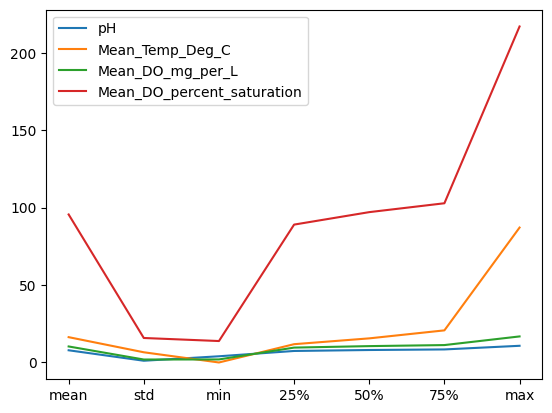

In [6]:
ra_glorich_df[columns].describe().drop(["count"]).plot()

<Axes: >

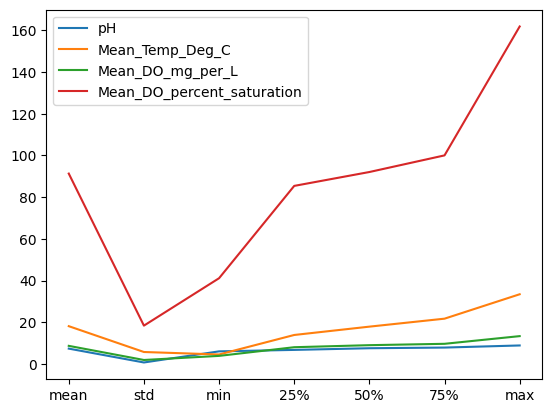

In [7]:
s19s_sss_df[columns].describe().drop(["count"]).plot()

view the descriptions on the same graph

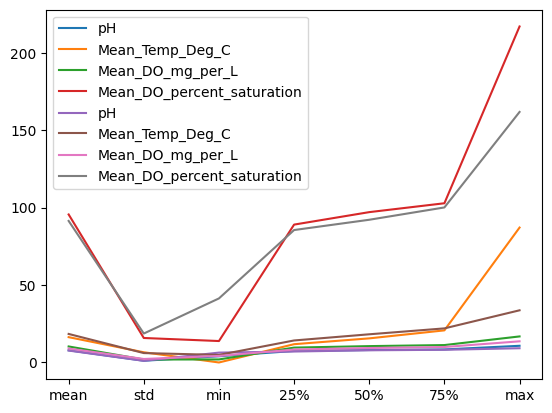

In [8]:
ax = ra_glorich_df[columns].describe().drop(["count"]).plot()
s19s_sss_df[columns].describe().drop(["count"]).plot(ax=ax)

plt.show()

## missing/nan values 

- `ra_glorich_df` has 42.998808% more missing `Mean_DO_mg_per_L` values than `s19s_sss_df`
- `ra_glorich_df` has 20.253926% more missing `Mean_DO_percent_saturation` values than `s19s_sss_df`

In [9]:
# total missing values
ra_glorich_df[columns].isnull().sum()

pH                              84
Mean_Temp_Deg_C                  0
Mean_DO_mg_per_L              7534
Mean_DO_percent_saturation    4797
dtype: int64

In [10]:
# total missing values
s19s_sss_df[columns].isnull().sum()

pH                              0
Mean_Temp_Deg_C                 3
Mean_DO_mg_per_L              105
Mean_DO_percent_saturation     93
dtype: int64

In [11]:
# percentage missing values
ra_glorich_df[columns].isnull().mean() * 100

pH                             0.798403
Mean_Temp_Deg_C                0.000000
Mean_DO_mg_per_L              71.609163
Mean_DO_percent_saturation    45.594525
dtype: float64

In [12]:
# percentage missing values
s19s_sss_df[columns].isnull().mean() * 100

pH                             0.000000
Mean_Temp_Deg_C                0.817439
Mean_DO_mg_per_L              28.610354
Mean_DO_percent_saturation    25.340599
dtype: float64

In [13]:
# difference in percentage of missing valuse
(ra_glorich_df[columns].isnull().mean() - s19s_sss_df[columns].isnull().mean()) * 100

pH                             0.798403
Mean_Temp_Deg_C               -0.817439
Mean_DO_mg_per_L              42.998808
Mean_DO_percent_saturation    20.253926
dtype: float64